# KMRD
- https://github.com/lovit/kmrd

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data_path = '../../data/'

In [21]:
path = data_path + "kmrd/kmr_dataset/datafile/kmrd-small"
print(os.listdir(path))

['peoples.txt', 'genres.csv', 'movies.txt', 'castings.csv', 'countries.csv', 'rates.csv']


In [22]:
castings_df = pd.read_csv(path + '/castings.csv')
print(castings_df.shape)
castings_df.head()

(9776, 4)


,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [23]:
countries_df = pd.read_csv(path + '/countries.csv')
print(countries_df.shape)
countries_df.head()

(1109, 2)


,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [24]:
genres_df = pd.read_csv(path + '/genres.csv')
print(genres_df.shape)
genres_df.head()

(2025, 2)


,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [25]:
movies_df = pd.read_csv(path + '/movies.txt', delimiter='\t')
print(movies_df.shape)
movies_df.head()

(999, 5)


,movie,title,title_eng,year,grade
0,10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
1,10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
2,10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
3,10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
4,10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [26]:
peoples_df = pd.read_csv(path + '/peoples.txt', delimiter='\t')
print(peoples_df.shape)
peoples_df.head()

(7172, 3)


,people,korean,original
0,5,아담 볼드윈,Adam Baldwin
1,8,애드리안 라인,Adrian Lyne
2,9,에이단 퀸,Aidan Quinn
3,13,구로사와 아키라,Akira Kurosawa
4,15,알 파치노,Al Pacino


In [27]:
rates_df = pd.read_csv(path + '/rates.csv')
print(rates_df.shape)
rates_df.head()

(140710, 4)


,user,movie,rate,time
0,0,10003,7,1494128040
1,0,10004,7,1467529800
2,0,10018,9,1513344120
3,0,10021,9,1424497980
4,0,10022,7,1427627340


- genres 데이터

In [28]:
groups = genres_df.groupby('movie')
genres = [(list(set(x['movie'].values))[0], '/'.join(x['genre'].values)) for index, x in groups]
combined_genres_df = pd.DataFrame(data=genres, columns=['movie', 'genres'])
combined_genres_df = combined_genres_df.set_index('movie')
combined_genres_df.head()

,genres
movie,
10001,드라마/멜로/로맨스
10002,SF/코미디
10003,SF/코미디
10004,서부/SF/판타지/코미디
10005,판타지/모험/SF/액션


In [29]:
movies_df = movies_df.set_index('movie')
movies_df.head()

,title,title_eng,year,grade
movie,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [30]:
movies_df = pd.concat([movies_df, combined_genres_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres
movie,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션


- peoples, castings 데이터

In [31]:
castings = [(list(set(x['movie'].values))[0], x['people'].values) for index, x in castings_df.groupby('movie')]
combined_castings_df = pd.DataFrame(data=castings, columns=['movie','people'])
combined_castings_df = combined_castings_df.set_index('movie')
combined_castings_df.head()

,people
movie,
10001,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,"[1007, 535, 215, 1236, 35]"


In [32]:
castings = [(list(set(x['movie'].values))[0], x['people'].values) for index, x in castings_df.groupby('movie')]
combined_castings_df = pd.DataFrame(data=castings, columns=['movie','people'])
combined_castings_df = combined_castings_df.set_index('movie')
combined_castings_df.head()

,people
movie,
10001,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,"[1007, 535, 215, 1236, 35]"


- ratings 데이터

In [33]:
n_unique_users = len(rates_df['user'].unique())
print(n_unique_users)

n_unique_movies = len(rates_df['movie'].unique())
print(n_unique_movies)

print('평점의 평균: ', rates_df['rate'].mean())
print('평점의 표준편차: ', rates_df['rate'].std())

52028
600
평점의 평균:  8.953258474877407
평점의 표준편차:  2.1060471738510547


In [34]:
rates_df.isnull().sum()

user     0
movie    0
rate     0
time     0
dtype: int64

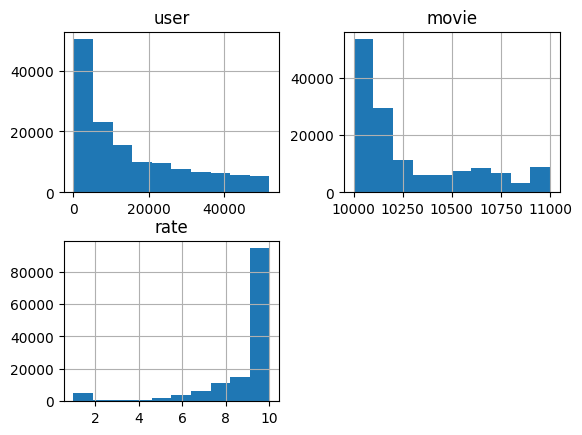

In [37]:
rates_df[['user','movie','rate']].hist();

- user가 평점을 준 영화 수 & 평균 평점

In [38]:
stats_df = pd.DataFrame({
    'movie_count': rates_df.groupby('user')['movie'].count(),
    'rating_avg': rates_df.groupby('user')['rate'].mean(), 
'rating_std': rates_df.groupby('user')['rate'].std()})

print(stats_df.shape)
print(stats_df.head())

(52028, 3)
      movie_count  rating_avg  rating_std
user                                     
0              85    7.388235    1.337144
1               1    9.000000         NaN
2              15    7.733333    1.869556
3              92    7.413043    1.638494
4              71    6.760563    2.338893


- rate가 많은 영화

In [39]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': rates_df.groupby('movie')['user'].count(),
    'avg_ratings': rates_df.groupby('movie')['rate'].mean(),
    'std_ratings': rates_df.groupby('movie')['rate'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(600, 4)
   movie  num_users_watch  avg_ratings  std_ratings
0  10001             3635     9.294360     2.032011
1  10002             3004     9.416778     1.740604
2  10003              989     9.270981     1.741194
3  10004              700     9.120000     1.688944
4  10005              905     9.048619     1.935881
5  10006              747     9.115127     2.004051
6  10007              699     9.034335     1.886909
7  10008              242     8.805785     2.108934
8  10009              119     8.462185     2.053480
9  10011               76     5.250000     3.128898


- 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [40]:
# 평점을 많이 받은 영화 
ratings_count_df = rates_df.groupby('movie')['user'].count()
ratings_count_df.head()

movie
10001    3635
10002    3004
10003     989
10004     700
10005     905
Name: user, dtype: int64

In [41]:
df = pd.DataFrame({
    'ratings_count': rates_df.groupby('movie')['user'].count(),
})
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [42]:
df.sort_values(by='ratings_count', ascending=False).head()

,ratings_count,movie_name
movie,,
10200,7265,터미네이터 2:오리지널
10048,7016,죽은 시인의 사회
10102,4391,사운드 오브 뮤직
10016,4029,나 홀로 집에
10936,3690,가위손


In [43]:
df.sort_values(by='ratings_count', ascending=False).tail()

,ratings_count,movie_name
movie,,
10937,1,위기의 여자
10510,1,성춘향전
10799,1,내 친구 제제
10811,1,이자벨 에버하트
10585,1,위대한 지그펠드


# Netflix
- https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data?select=qualifying.txt
- https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data?select=qualifying.txt